**Feature Engineering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

from pyforest import*
lazy_imports()

['import sklearn',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.decomposition import PCA',
 'import tensorflow as tf',
 'import plotly as py',
 'from scipy import stats',
 'import fbprophet',
 'from sklearn.cluster import KMeans',
 'import plotly.graph_objs as go',
 'import pandas as pd',
 'from dask import dataframe as dd',
 'import nltk',
 'import re',
 'import os',
 'import torch',
 'from sklearn.model_selection import KFold',
 'from sklearn.preprocessing import StandardScaler',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import LogisticRegression',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import LassoCV',
 'import keras',
 'import altair as alt',
 'import cv2',
 'import fastai',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.

In [2]:
df = pd.read_csv('concrete_data.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [5]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df.concrete_compressive_strength

In [6]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

#### Random Forest

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# model performance
model.score(X_test,y_test)

0.8808940615999828

In [11]:
model.score(X_train, y_train)

0.9836784237676595

In [12]:
acc_R = metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8808940615999828

In [13]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

31.218523899892983

In [14]:
result_1 = pd.DataFrame({'Algorithm':['Random Forest'],'accuracy': acc_R}, index={'1'})
results = result_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894


**KFold Cross Validation**

In [15]:
k = 20

kfold = KFold(n_splits = k)
K_results = cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7893748860466638

In [16]:
random_re = pd.DataFrame({'Algorithm':['Random Forest Regressor k_fold'],'accuracy': accuracy}, index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375


#### Gradient Boosting Regressor

In [17]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
acc_G = metrics.r2_score(y_test, y_pred)
print(acc_G)
metrics.mean_squared_error(y_test,y_pred)

gradient_re = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy': acc_G}, index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

0.9527437802952219
0.8817764588104924


<IPython.core.display.Javascript object>

0.8817764588104924


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776


**KFold**

In [18]:
k = 20

kfold = KFold(n_splits = k)
K_results_3= cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results_3))
accuracy

gradient_re_kfold = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor_kfold'],'accuracy': accuracy}, index={'4'})
results = pd.concat([results, gradient_re_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184


#### Ada Boosting Regressor

In [19]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
acc_Ada = metrics.r2_score(y_test, y_pred)
print(acc_Ada)
print(metrics.mean_squared_error(y_test,y_pred))

adaboost_re = pd.DataFrame({'Algorithm':['Adaboost Regressor'],'accuracy': acc_Ada}, index={'5'})
results = pd.concat([results, adaboost_re])
results = results[['Algorithm','accuracy']]
results

0.8260084520413613
0.764550515691229


<IPython.core.display.Javascript object>

0.764550515691229


<IPython.core.display.Javascript object>

61.713004841325265


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551


**KFold**

In [21]:
k = 20

kfold = KFold(n_splits = k)
K_results= cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results))
# accuracy

Adaboost_kfold = pd.DataFrame({'Algorithm':['Adaboost Regressor_kfold'],'accuracy': accuracy}, index={'6'})
results = pd.concat([results, Adaboost_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641


### KNN Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
# checking for different values of neighbors to determine the best

diff_k = []
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean error')

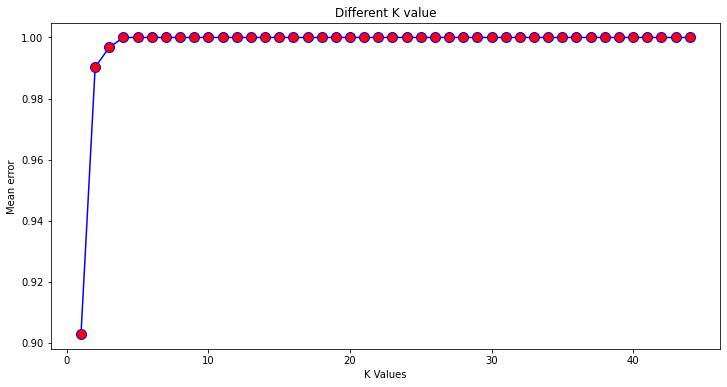

In [24]:
plt.figure(figsize = (12,6))
plt.plot(range(1,45), diff_k, color = 'blue', linestyle='-', marker='o', markerfacecolor='red', markersize=10)
plt.title('Different K value')
plt.xlabel('K Values')
plt.ylabel('Mean error')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean error')

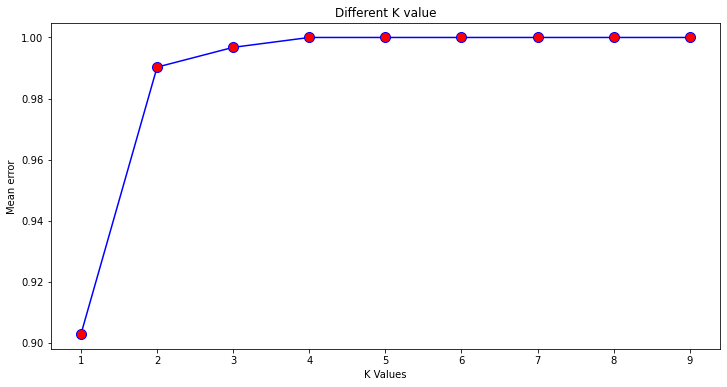

In [25]:
# checking for different values of neighbors to determine the best

diff_k = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,10), diff_k, color = 'blue', linestyle='-', marker='o', markerfacecolor='red', markersize=10)
plt.title('Different K value')
plt.xlabel('K Values')
plt.ylabel('Mean error')

In [26]:
# choosing k=4 as the best value
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
acc_knn = metrics.r2_score(y_test, y_pred)
print(acc_knn)
print(metrics.mean_squared_error(y_test,y_pred))

knn = pd.DataFrame({'Algorithm':['KNeighbors Regressor'],'accuracy': acc_knn}, index={'7'})
results = pd.concat([results, knn])
results = results[['Algorithm','accuracy']]
results


0.8440910322007888
0.628962537332703


<IPython.core.display.Javascript object>

0.628962537332703


<IPython.core.display.Javascript object>

97.25159006877023


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963


**KFold**

In [27]:
k = 20

kfold = KFold(n_splits = k)
K_results_3= cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results_3))
accuracy

KNeighbors_kfold = pd.DataFrame({'Algorithm':['KNeighbors Regressor_kfold'],'accuracy': accuracy}, index={'8'})
results = pd.concat([results, KNeighbors_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963
8,KNeighbors Regressor_kfold,0.664710


In [28]:
# results.drop(labels=['7','8'], axis=0, inplace=True)

### Bagging Regressor

In [29]:
from sklearn.ensemble import BaggingRegressor

In [30]:
model = BaggingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
acc_BG = metrics.r2_score(y_test, y_pred)
print(acc_BG)
metrics.mean_squared_error(y_test,y_pred)

bagging_re = pd.DataFrame({'Algorithm':['Bagging Regressor'],'accuracy': acc_BG}, index={'9'})
results = pd.concat([results, bagging_re])
results = results[['Algorithm','accuracy']]
results


0.9758159623167567
0.8796823408343184


<IPython.core.display.Javascript object>

0.8796823408343184


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963
8,KNeighbors Regressor_kfold,0.664710
9,Bagging Regressor,0.879682


**KFold**

In [31]:
k = 20

kfold = KFold(n_splits = k)
K_results_3= cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results_3))

bagging_re_kfold = pd.DataFrame({'Algorithm':['Bagging Regressor_kfold'],'accuracy': accuracy}, index={'10'})
results = pd.concat([results, bagging_re_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963
8,KNeighbors Regressor_kfold,0.664710
9,Bagging Regressor,0.879682
10,Bagging Regressor_kfold,0.742411


### SVM

In [32]:
from sklearn.svm import SVR

In [33]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
acc_svm = metrics.r2_score(y_test, y_pred)
print(acc_svm)
print(metrics.mean_squared_error(y_test,y_pred))

svm_re = pd.DataFrame({'Algorithm':['SVM Regressor'],'accuracy': acc_svm}, index={'11'})
results = pd.concat([results, svm_re])
results = results[['Algorithm','accuracy']]
results


0.5838444958800892
0.46082478599385


<IPython.core.display.Javascript object>

0.46082478599385


<IPython.core.display.Javascript object>

141.32170512061126


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963
8,KNeighbors Regressor_kfold,0.664710
9,Bagging Regressor,0.879682
10,Bagging Regressor_kfold,0.742411


In [34]:
k = 10

kfold = KFold(n_splits = k)
K_results_3= cross_val_score(model, X,y, cv=kfold)
accuracy = np.mean(abs(K_results_3))
accuracy

svm_kfold = pd.DataFrame({'Algorithm':['SVM_kfold'],'accuracy': accuracy}, index={'12'})
results = pd.concat([results, svm_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.880894
2,Random Forest Regressor k_fold,0.789375
3,Gradient Boosting Regressor,0.881776
4,Gradient Boosting Regressor_kfold,0.769184
5,Adaboost Regressor,0.764551
6,Adaboost Regressor_kfold,0.588641
7,KNeighbors Regressor,0.628963
8,KNeighbors Regressor_kfold,0.664710
9,Bagging Regressor,0.879682
10,Bagging Regressor_kfold,0.742411


In [117]:
results.drop(labels=['11','12'], axis=0, inplace=True)

In [35]:
results.to_csv('results.csv', index=False)